In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import function as func
from ellipsoid_mirror import *
np.set_printoptions(threshold=20)

plt.rcParams['font.size'] = 18
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

# General setting

In [3]:
freq = 215*GHz 
wavelength = calc_wavelength(freq)

# Setup calculation

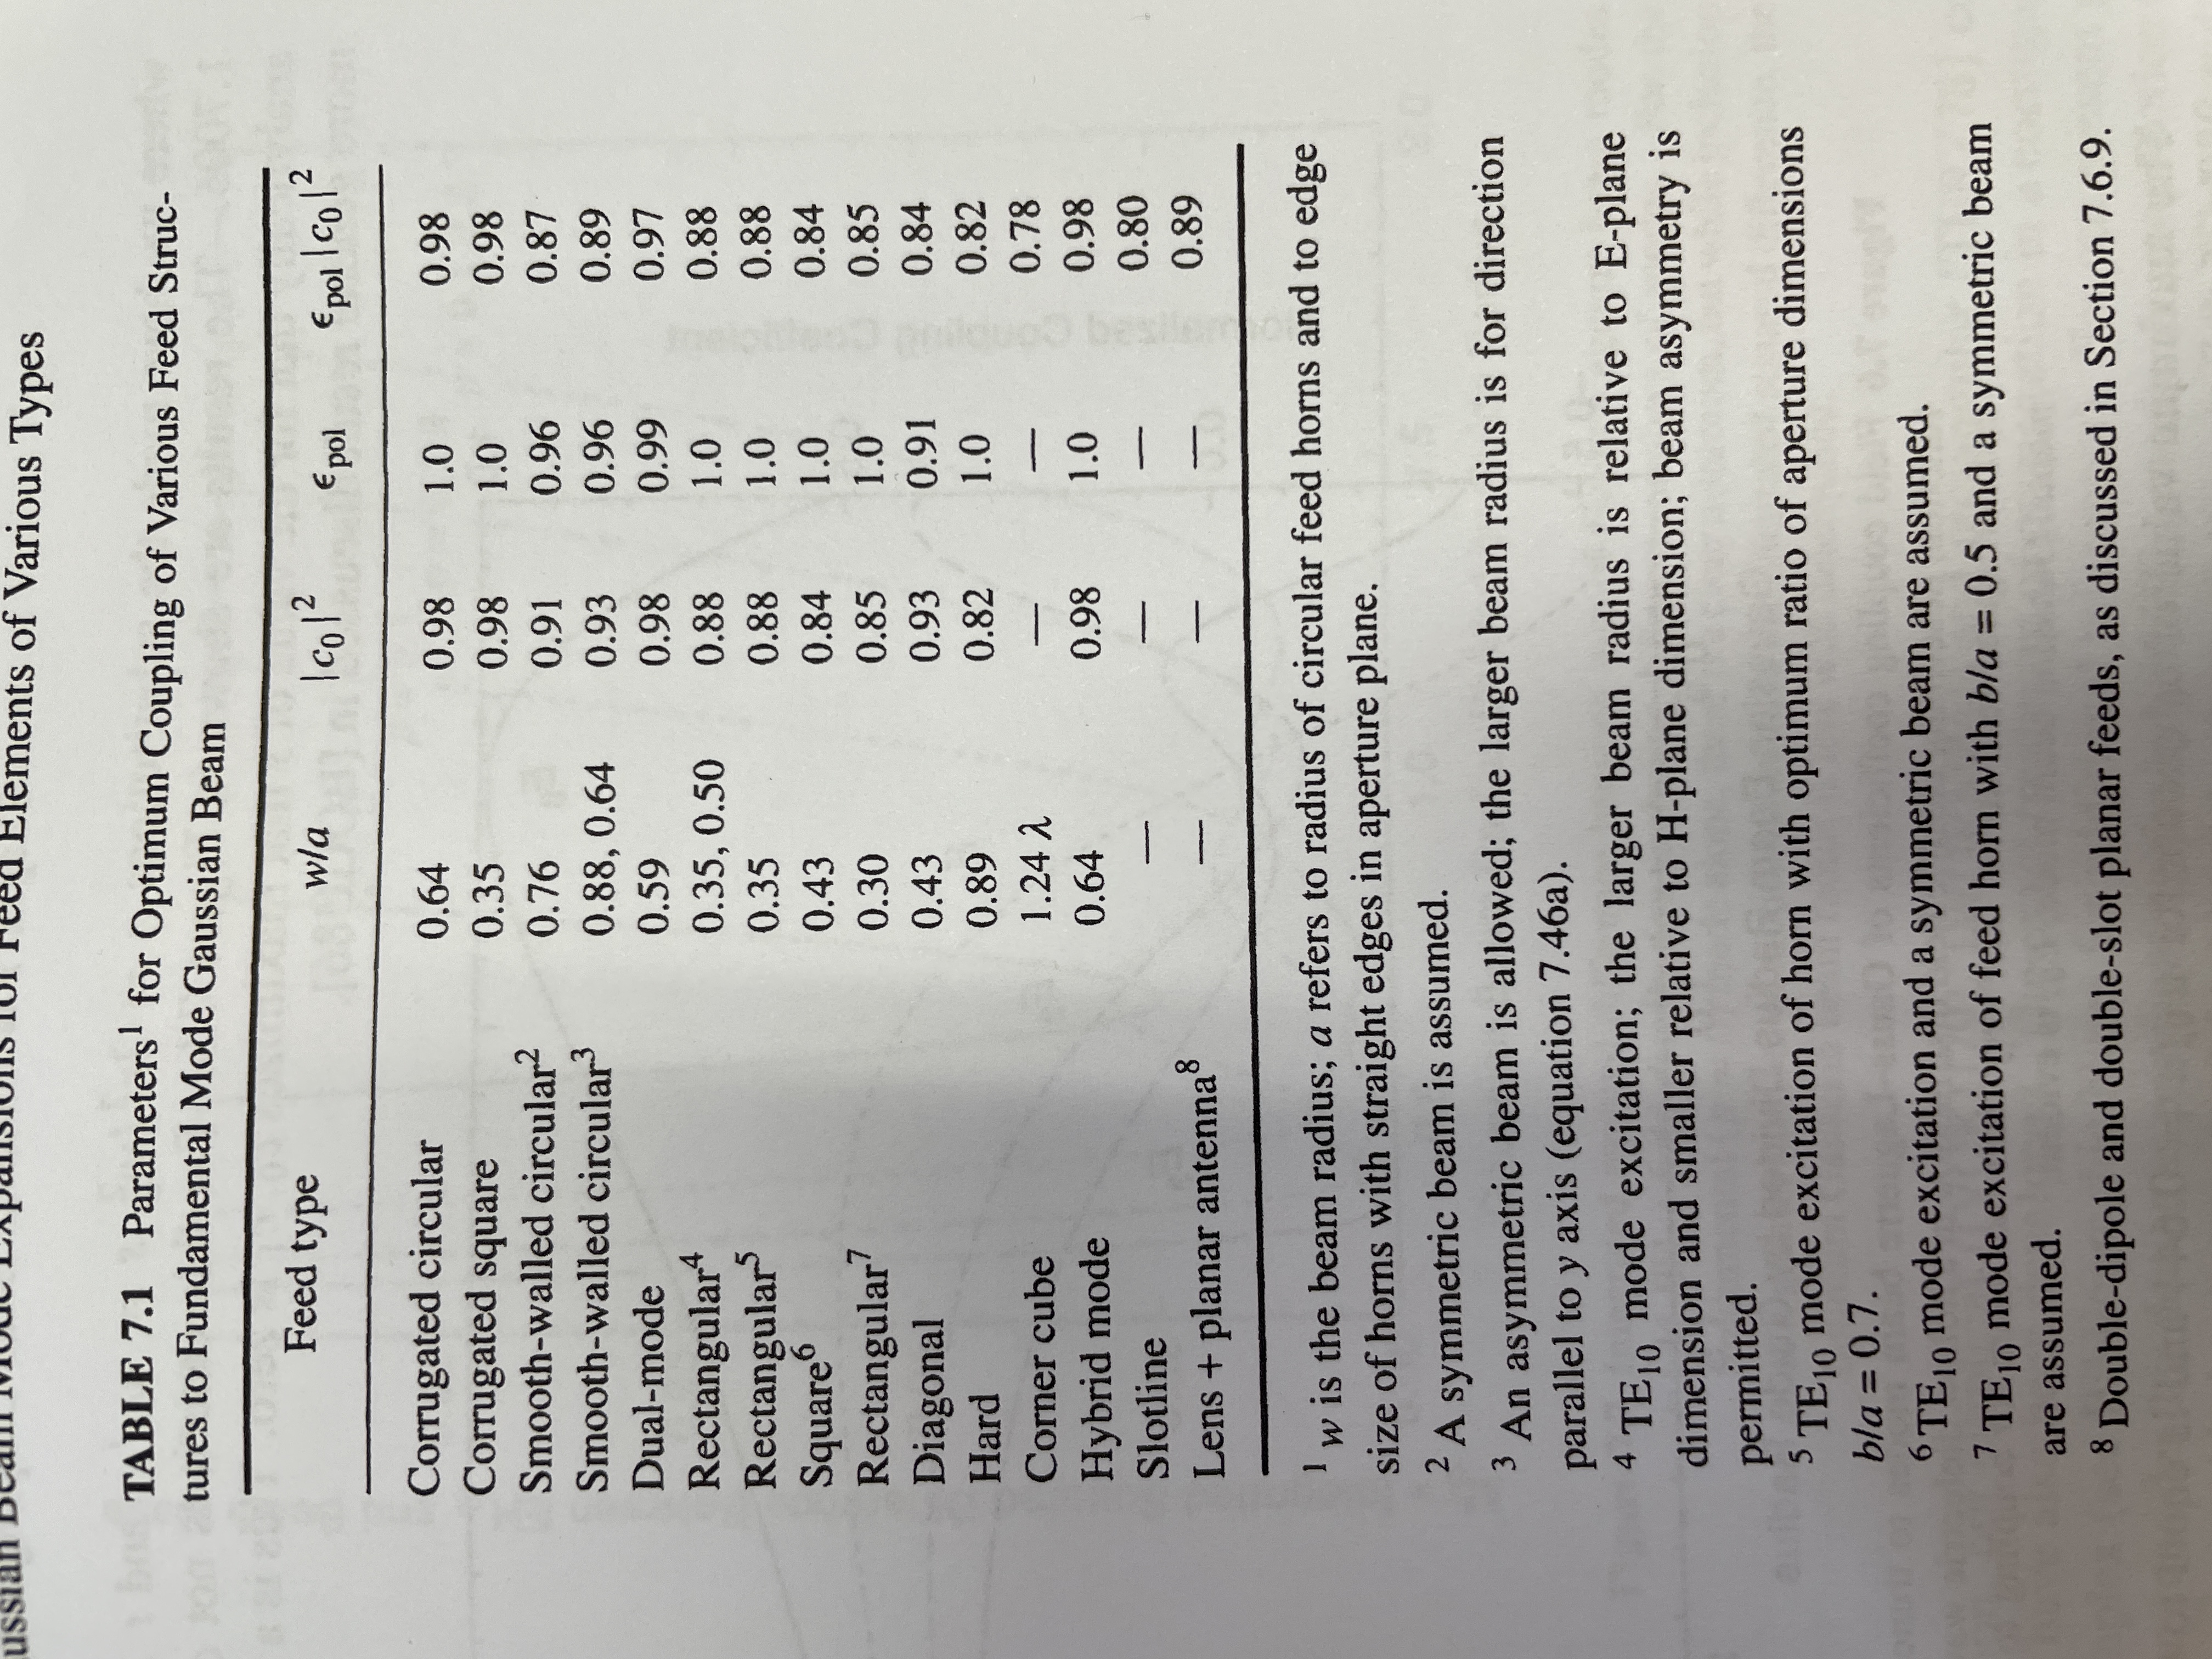

In [4]:
from IPython.display import Image
Image('Goldsmith_table7.1.JPG', width=400)

In [5]:
def calc_antenna_parameters(
    antenna_a,  # waveguid short edge (E-plane)
    antenna_b,  # waveguid long edge (H-plane)
    antenna_L,  # taper section length
    antenna_taper, # taper angle [rad]
    antenna_w_over_A = 0.50, # w/A at aperture in E-plane
    antenna_w_over_B = 0.35, # w/B at aperture in H-plane
    # from P. F. Goldsmith table 7.1 
    # rectangular^5: H-plane = 0.35
    #                           E-plane = 0.50
    verbose = 1,
    ):
    
    if antenna_w_over_B is None:
        antenna_w_over_B = antenna_w_over_A
        pass
    antenna_A = antenna_a + 2. * antenna_L * np.tan(antenna_taper)
    antenna_B = antenna_b + 2. * antenna_L * np.tan(antenna_taper)
    antenna_Ra = antenna_A/2. / np.sin(antenna_taper)
    antenna_Rb = antenna_B/2. / np.sin(antenna_taper)

    # Beam waist
    antenna_wA = antenna_w_over_A * antenna_A
    antenna_wB = antenna_w_over_B * antenna_B
    antenna_w0A = calc_beamwaist0(w=antenna_wA, R=antenna_Ra, wavelength=wavelength)
    antenna_w0B = calc_beamwaist0(w=antenna_wB, R=antenna_Rb, wavelength=wavelength)
    antenna_d0A = calc_waist_distance(w=antenna_wA, R=antenna_Ra, wavelength=wavelength)
    antenna_d0B = calc_waist_distance(w=antenna_wB, R=antenna_Rb, wavelength=wavelength)
    antenna_L0A = antenna_L - antenna_d0A
    antenna_L0B = antenna_L - antenna_d0B

    # Check
    if verbose > 0:
        print(f'a = {antenna_a/mm} mm')
        print(f'b = {antenna_b/mm} mm')
        print(f'A = {antenna_A/mm} mm')
        print(f'B = {antenna_B/mm} mm')
        print(f'Ra = {antenna_Ra/mm} mm')
        print(f'Rb = {antenna_Rb/mm} mm')
        print(f'A/B = {antenna_A/antenna_B}')
        print(f'w_A/A = {antenna_w_over_A}')
        print(f'w_B/B = {antenna_w_over_B}')
        print(f'beam waist in A = {antenna_w0A/mm} mm')
        print(f'beam waist distance from aperture in A = -{antenna_d0A/mm} mm')
        print(f'beam waist distance from antenna bottom in A = {antenna_L0A/mm} mm')
        print(f'beam waist in B = {antenna_w0B/mm} mm')
        print(f'beam waist distance from aperture in B = -{antenna_d0B/mm} mm')
        print(f'beam waist distance from antenna bottom in B = {antenna_L0B/mm} mm')
        print(f'antenna taper angle in A = {np.rad2deg( np.arcsin(antenna_A/2./antenna_Ra) )} deg')
        print(f'antenna taper angle in B = {np.rad2deg( np.arcsin(antenna_B/2./antenna_Rb) )} deg')
        pass
    
    antenna_pars = {
        'L': antenna_L,
        'taper':antenna_taper,
        'w_over_A': antenna_w_over_A, 
        'w_over_B': antenna_w_over_B, 
        
        'a': antenna_a, 
        'A': antenna_A, 
        'Ra': antenna_Ra, 
        'wA': antenna_wA, 
        'w0A': antenna_w0A, 
        'd0A': antenna_d0A, 
        'L0A': antenna_L0A, 
        
        'b': antenna_b, 
        'B': antenna_B, 
        'Rb': antenna_Rb, 
        'wB': antenna_wB, 
        'w0B': antenna_w0B, 
        'd0B': antenna_d0B, 
        'L0B': antenna_L0B, 
        }
    
    return antenna_pars


def calc_circular_antenna_parameters(
    antenna_r, # Radius in aperture
    antenna_L,  # taper section length
    antenna_taperA, # taper angle in E-plane
    antenna_taperB, # taper angle in H-plane
    antenna_w_over_A = 0.88, # w/A at aperture in E-plane
    antenna_w_over_B = 0.64, # w/B at aperture in H-plane
    # from P. F. Goldsmith table 7.1 
    # smooth-walled circular: E-plane = 0.88
    #                                          H-plane = 0.64
    verbose = 1,
    ):
    
    if antenna_w_over_B is None:
        antenna_w_over_B = antenna_w_over_A
        pass
    #antenna_A = antenna_R*2. # aperture diameter in E-plane
    #antenna_B = antenna_R*2. # aperture diameter in H-plane
    antenna_rA = antenna_r # aperture radius in E-plane
    antenna_rB = antenna_r # aperture radius in H-plane
    antenna_Ra = antenna_rA / np.sin(antenna_taperA) # curvature at antenna aperture in E-plane
    antenna_Rb = antenna_rB / np.sin(antenna_taperB) # curvature at antenna aperture in H-plane

    # Beam waist
    #antenna_wA = antenna_w_over_A * antenna_A
    #antenna_wB = antenna_w_over_B * antenna_B
    antenna_wA = antenna_w_over_A * antenna_rA
    antenna_wB = antenna_w_over_B * antenna_rB
    antenna_w0A = calc_beamwaist0(w=antenna_wA, R=antenna_Ra, wavelength=wavelength)
    antenna_w0B = calc_beamwaist0(w=antenna_wB, R=antenna_Rb, wavelength=wavelength)
    antenna_d0A = calc_waist_distance(w=antenna_wA, R=antenna_Ra, wavelength=wavelength)
    antenna_d0B = calc_waist_distance(w=antenna_wB, R=antenna_Rb, wavelength=wavelength)
    antenna_L0A = antenna_L - antenna_d0A
    antenna_L0B = antenna_L - antenna_d0B

    # Check
    if verbose > 0:
        print(f'rA = {antenna_rA/mm} mm')
        print(f'rB = {antenna_rB/mm} mm')
        print(f'Ra = {antenna_Ra/mm} mm')
        print(f'Rb = {antenna_Rb/mm} mm')
        print(f'w_A/A = {antenna_w_over_A}')
        print(f'w_B/B = {antenna_w_over_B}')
        print(f'beam waist in A = {antenna_w0A/mm} mm')
        print(f'beam waist distance from aperture in A = -{antenna_d0A/mm} mm')
        print(f'beam waist distance from antenna bottom in A = {antenna_L0A/mm} mm')
        print(f'beam waist in B = {antenna_w0B/mm} mm')
        print(f'beam waist distance from aperture in B = -{antenna_d0B/mm} mm')
        print(f'beam waist distance from antenna bottom in B = {antenna_L0B/mm} mm')
        print(f'antenna taper angle in A = {np.rad2deg( np.arcsin(antenna_r/antenna_Ra) )} deg')
        print(f'antenna taper angle in B = {np.rad2deg( np.arcsin(antenna_r/antenna_Rb) )} deg')
        pass
    
    antenna_pars = {
        'L': antenna_L,
        'taper':antenna_taper,
        'w_over_A': antenna_w_over_A, 
        'w_over_B': antenna_w_over_B, 
        
        'rA': antenna_rA, 
        'Ra': antenna_Ra, 
        'wA': antenna_wA, 
        'w0A': antenna_w0A, 
        'd0A': antenna_d0A, 
        'L0A': antenna_L0A, 
        
        'rB': antenna_rB, 
        'Rb': antenna_Rb, 
        'wB': antenna_wB, 
        'w0B': antenna_w0B, 
        'd0B': antenna_d0B, 
        'L0B': antenna_L0B, 
        }
    
    return antenna_pars

## Circuar Horn antenna

In [6]:
antenna_r0 = 0.6*mm
antenna_r1 = 5*mm
antenna_L = 70*mm
antenna_taper = np.arctan( (antenna_r1 - antenna_r0)/antenna_L )
print(f'taper = {np.rad2deg(antenna_taper)} deg')
antenna_pars = calc_circular_antenna_parameters(
    antenna_r=antenna_r1,
    antenna_taperA = antenna_taper, 
    antenna_taperB = antenna_taper, 
    antenna_L=antenna_L, 
    antenna_w_over_A = 0.88, # smooth-walled  circular E-plane
    antenna_w_over_B = 0.64, # smooth-walled circular H-plane
)

w0 = antenna_pars['w0A'] # beam waist
d_waist = antenna_pars['d0A'] # distance from waist to aperture
L_waist = antenna_pars['L0A'] # distance from antenna bottom to beam waist
print(f'w0 = {w0/mm} mm')
print(f'd_waist = {d_waist/mm} mm')
print(f'L_waist = {L_waist/mm} mm')

taper = 3.5967170776284667 deg
rA = 5.0 mm
rB = 5.0 mm
Ra = 79.70244248981943 mm
Rb = 79.70244248981943 mm
w_A/A = 0.88
w_B/B = 0.64
beam waist in A = 3.8597916056636232 mm
beam waist distance from aperture in A = -18.36947296749009 mm
beam waist distance from antenna bottom in A = 51.63052703250992 mm
beam waist in B = 3.07381283249564 mm
beam waist distance from aperture in B = -6.161953605361194 mm
beam waist distance from antenna bottom in B = 63.838046394638816 mm
antenna taper angle in A = 3.5967170776284667 deg
antenna taper angle in B = 3.5967170776284667 deg
w0 = 3.8597916056636232 mm
d_waist = 18.36947296749009 mm
L_waist = 51.63052703250992 mm


## Distance between antenna and parabolic mirror

In [7]:
beamsize_mirror = 150*mm/2.
_w0 = w0

z_mirror = calc_distance_from_beamsize(w=beamsize_mirror, w0=_w0, wavelength=wavelength)
d_mirror = z_mirror - np.abs(d_waist)
R_mirror = calc_R(z=z_mirror, w0=_w0, wavelength=wavelength)

print(f'beamsize (w) @ mirror = {beamsize_mirror/mm} mm')
print(f'distance from antenna aperture = {d_mirror/mm} mm')
print(f'z from beamwaist @ mirror = {z_mirror/mm} mm')
print(f'R @ mirror = {R_mirror/mm} mm')

print()
print(f'Mirror distance from antenna bottom = {(d_mirror + antenna_L)/mm} mm')

beamsize (w) @ mirror = 75.0 mm
distance from antenna aperture = 632.9841993330052 mm
z from beamwaist @ mirror = 651.3536723004953 mm
R @ mirror = 653.0833843963482 mm

Mirror distance from antenna bottom = 702.9841993330052 mm


In [8]:
def calc_mirror_distance(
    w0, L, d_waist,
    beamsize_mirror = 250*mm/2.,
):
    
    z_mirror = calc_distance_from_beamsize(w=beamsize_mirror, w0=w0, wavelength=wavelength)
    d_mirror = z_mirror - np.abs(d_waist)
    R_mirror = calc_R(z=z_mirror, w0=_w0, wavelength=wavelength)
    L_waist = L - d_waist

    print(f'beamsize (w) @ mirror = {beamsize_mirror/mm} mm')
    print(f'distance from antenna aperture = {d_mirror/mm} mm')
    print(f'z from beamwaist @ mirror = {z_mirror/mm} mm')
    print(f'R @ mirror = {R_mirror/mm} mm')
    print()
    print(f'f = {R_mirror/2./mm} mm')
    print(f'L = {(L)/mm} mm')
    print(f'L_waist = {L_waist/mm} mm')
    print(f'Mirror distance from antenna bottom = {(d_mirror + L)/mm} mm')

    return beamsize_mirror, \
            w0, z_mirror, d_mirror, R_mirror, L_waist

calc_mirror_distance(
    beamsize_mirror = beamsize_mirror,
    w0 = w0,
    L = antenna_L,
    d_waist = d_waist
)

beamsize (w) @ mirror = 75.0 mm
distance from antenna aperture = 632.9841993330052 mm
z from beamwaist @ mirror = 651.3536723004953 mm
R @ mirror = 653.0833843963482 mm

f = 326.5416921981741 mm
L = 70.0 mm
L_waist = 51.63052703250992 mm
Mirror distance from antenna bottom = 702.9841993330052 mm


(0.075,
 0.0038597916056636234,
 0.6513536723004953,
 0.6329841993330052,
 0.6530833843963482,
 0.05163052703250992)

# Simulation Expectation

## Mirror Configurations

In [9]:
f_mirror = 250.94*mm # focal distance setup in the CST simulation
R_mirror = 2 * f_mirror
z_mirror = 549.38*mm # mirror distance from beam waist at the antenna
w_mirror = calc_beamwaist(w0=w0, z=z_mirror, wavelength=wavelength) # beam size (radius) @ mirror
L_waist = 48.28*mm # distance between the beam waist and antenna bottom (boundary betweeen waveguide and taper sections)
D_mirror = 1500/2.*mm # diameter of the mirror
slant_angle = np.deg2rad(90.)

print(f'Beam waist @ antenna   w0 = {w0/mm:.3f} mm')
print(f'z @ mirror              z = {z_mirror/mm:.3f} mm')
print(f'beam size @ mirror      w = {w_mirror/mm:.3f} mm')
print(f'Focal distance          f = {f_mirror/mm} mm')
print(f'Curvature of the mirror R = {R_mirror/mm} mm')
print(f'Slant angle               = {np.rad2deg(slant_angle):.0f} deg')

Beam waist @ antenna   w0 = 3.860 mm
z @ mirror              z = 549.380 mm
beam size @ mirror      w = 63.292 mm
Focal distance          f = 250.94 mm
Curvature of the mirror R = 501.88 mm
Slant angle               = 90 deg


## Beam between Antenna and Mirror

z_antenna_list        = [  0.  10.  20. ... 970. 980. 990.] mm
beamsize_antenna_list = [  3.85979161   4.02744493   4.49302535 ... 111.60922916 112.75847066
 113.90772591] mm
R_antenna_list        = [         inf 122.66543257  76.33271628 ... 971.1614993  981.14964727
 991.13803467] mm


/data/analysis/adachi/analysis/Optics/ellipsoid_mirror.py:27: RuntimeWarning: divide by zero encountered in true_divide
  return z + z_c * z_c / z


(0.0, 200.0)

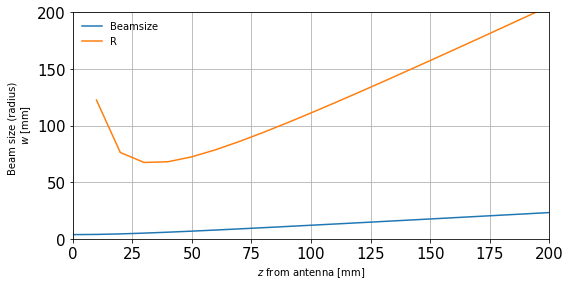

In [10]:
_dz = 10*mm
z_antenna_list = np.arange(0*mm, 1, _dz)  # z position from reflection
beamsize_antenna_list = calc_beamwaist(z=z_antenna_list, w0=w0, wavelength=wavelength)
R_antenna_list = calc_R(z=z_antenna_list, w0=w0, wavelength=wavelength)
print(f'z_antenna_list        = {z_antenna_list/mm} mm')
print(f'beamsize_antenna_list = {beamsize_antenna_list/mm} mm')
print(f'R_antenna_list        = {R_antenna_list/mm} mm')

fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.plot(z_antenna_list/mm, beamsize_antenna_list/mm, label='Beamsize')
ax.plot(z_antenna_list/mm, R_antenna_list/mm, label='R')
ax.set_xlabel('$z$ from antenna [mm]')
ax.set_ylabel('Beam size (radius) \n $w$ [mm]')
ax.legend(frameon=False)
ax.grid(True)
fig.tight_layout()
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_xlim([0, 200])
ax.set_ylim([0, 200])

## Beam after mirror

In [11]:
height_after_ref = 2*f_mirror / np.sin(slant_angle) * np.abs(np.cos(slant_angle) - 1.)
print(f'height after reflection = {height_after_ref/mm} mm')

height after reflection = 501.8799999999999 mm


In [12]:
z_mirror_list = np.arange(0*mm, 2000*mm+_dz, _dz)  # z position from reflection
beamsize_mirror_list = calc_beamwaist(z=z_mirror_list, w0=w_mirror, wavelength=wavelength)
print(f'z_mirror_list (after mirror) = {z_mirror_list/mm} mm')
print(f'beamsize_mirror_list (after mirror) = {beamsize_mirror_list/mm} mm')

z_mirror_list (after mirror) = [   0.   10.   20. ... 1980. 1990. 2000.] mm
beamsize_mirror_list (after mirror) = [63.29223549 63.29227434 63.29239089 ... 64.7973873  64.81245047
 64.827586  ] mm


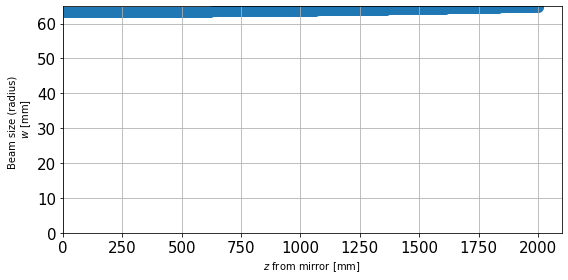

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.scatter(z_mirror_list/mm, beamsize_mirror_list/mm, s=100)
ax.set_xlabel('$z$ from mirror [mm]')
ax.set_ylabel('Beam size (radius) \n $w$ [mm]')
ax.grid(True)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
fig.tight_layout()

## Beam for all path

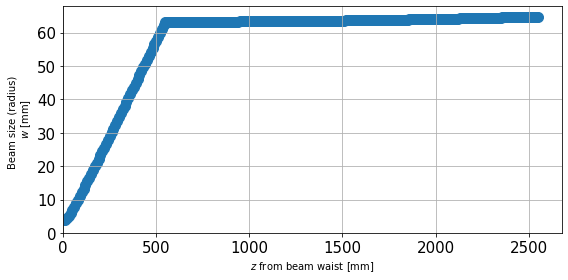

In [14]:
z_mirror_list_from_antenna = z_mirror_list + z_mirror
i_before_mirror = np.where( z_antenna_list < z_mirror)
z_list = np.hstack([z_antenna_list[i_before_mirror], z_mirror_list_from_antenna])
beamsize_list = np.hstack([beamsize_antenna_list[i_before_mirror], beamsize_mirror_list])

fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.scatter(z_list/mm, beamsize_list/mm, s=100)
ax.set_xlabel('$z$ from beam waist [mm]')
ax.set_ylabel('Beam size (radius) \n $w$ [mm]')
ax.grid(True)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
fig.tight_layout()

# Plot CST data

## Functions

In [15]:
def read_CST(filepath, datatype='', verbose=0):
    data = {}
    keys = []
    n_skipline = 0
    if datatype == '3D_E-field':
        keys = ['x', 'y', 'z', 'ExRe', 'ExIm', 'EyRe', 'EyIm', 'EzRe', 'EzIm']
        data = { key: [] for key in keys }
        n_skipline = 2
        split = None
    elif datatype == '3D_twovalue':
        keys = ['x', 'y', 'z', 'val0', 'val1']
        data = { key: [] for key in keys }
        n_skipline = 2
        split = None
    elif datatype == 'farfield1D':
        keys = ['angle', 'val']
        data = { key: [] for key in keys }
        split = '\t'
    else:
        print(f'Error!! There is no datatype for "{datatype}".')
        return -1
        pass
    if verbose > -1: print(f'input file = {filepath} (type={datatype})')
    if verbose > 0: print(f'keys = {keys}')
    
    with open(filepath) as f:
        fin = list( csv.reader(f, delimiter=' ', skipinitialspace=True) )
        for n, line in enumerate(fin):
            if split is not None:
                new_line = []
                for _l in line:
                    new_line+=_l.split(split)
                    pass
                line = new_line
                pass
            if n < n_skipline:
                if verbose > 1: print(f'skip line {n}')
                continue
            if line[0][0] == '#':
                if verbose > 1: print(f'skip line starting with #')
                continue
            if verbose > 1: print('line:', line)
            for k, key in enumerate(keys):
                data[key].append( float( line[k] ) )
                if verbose > 3: print(f'append data [{key}] = {data[key][-1]}')
                pass
            pass
        pass
    
    # Change to array
    for key in keys:
        data[key] = np.array( data[key] )
        pass
    
    return data

def getSlice(data, slicekey='x', slice_val=0.):
    print(slicekey, slice_val)
    val = data[slicekey]
    diff = np.abs(val - slice_val)
    min_diff = min(diff)+0.01
    slice_index = np.where( diff < min_diff )[0]
    print(f'getSlice min_diff = {min_diff}')
    data_slice = get_index_data(data, slice_index)
    return data_slice

def slice_file(infile, indir, slicekey='x', slice_val=0.):
    _infile_path = f'{indir}/{infile}'
    _data = read_CST(_infile_path, '3D_twovalue' )
    _data_slice = getSlice(_data, slicekey=slicekey, slice_val=slice_val)
    return _data_slice

In [16]:
from scipy.interpolate import griddata
from matplotlib import ticker, cm, colors
colorbar_frac=0.2

def plot2D_Eyz(data, logz=False, figsize=(8*(1.+colorbar_frac), 8.), levels=None):
    x_list = np.unique(data['x'])
    y_list = np.unique(data['y'])
    z_list = np.unique(data['z'])
    func.print_list(x_list)
    func.print_list(y_list)
    func.print_list(z_list)

    print(y_list.tolist())
    print(z_list.tolist())

    y_grid, z_grid = np.meshgrid(y_list, z_list)

    EyRe = griddata((data['y'], data['z']), data['EyRe'], (y_grid, z_grid))
    EzRe = griddata((data['y'], data['z']), data['EzRe'], (y_grid, z_grid))
    EyIm = griddata((data['y'], data['z']), data['EyIm'], (y_grid, z_grid))
    EzIm = griddata((data['y'], data['z']), data['EzIm'], (y_grid, z_grid))

    Ey_Mag = np.sqrt( np.power(EyRe, 2.) + np.power(EyIm, 2.) )
    Ez_Mag = np.sqrt( np.power(EzRe, 2.) + np.power(EzIm, 2.) )
    E_Mag = np.sqrt( np.power(Ey_Mag, 2.) + np.power(Ez_Mag, 2.) )

    fig, ax = plt.subplots(1,1,figsize=figsize)
    
    locator=ticker.LogLocator() if logz else ticker.MaxNLocator()
    cs = ax.contourf(y_grid, z_grid, E_Mag, levels=levels, cmap='jet', locator=locator)
    cbar = fig.colorbar(cs, ax=ax, format=colorbarFormat, fraction=colorbar_frac)
    cbar.ax.tick_params(labelsize=12)
    ax.set_aspect('equal')
    plt.gca().set_aspect('equal')
    fig.tight_layout()
    
    return fig, ax


def plot2D_key(data, keys=['y', 'z', 'val0'], figsize=(8*(1+colorbar_frac),8), logz=False, levels=None, newgrid=None,
              xlabel='', ylabel='', zlabel='', colorbarFormat='%.1e', grid=True, contourtype=None):
    x = data[keys[0]]
    y = data[keys[1]]
    if newgrid is None:
        x_list = np.unique(x)
        y_list = np.unique(y)
    else:
        x_list = newgrid[0]
        y_list = newgrid[1]
        pass
    func.print_list(x_list)
    func.print_list(y_list)

    x_grid, y_grid = np.meshgrid(x_list, y_list)

    z_grid = griddata((x, y), data[keys[2]], (x_grid, y_grid))

    fig, ax = plt.subplots(1,1,figsize=figsize)
    
    locator=ticker.LogLocator() if logz else ticker.MaxNLocator()
    if contourtype is None:
        cs = ax.contourf(x_grid, y_grid, z_grid, levels=levels, cmap='jet', locator=locator)
    elif contourtype=='line':
        cs = ax.contour(x_grid, y_grid, z_grid, levels=levels, cmap='jet', locator=locator)
    elif contourtype=='fill-line':
        ax.contour(x_grid, y_grid, z_grid, levels=levels, colors='black', locator=locator)
        cs = ax.contourf(x_grid, y_grid, z_grid, levels=levels, cmap='jet', locator=locator)
        pass
    cbar = fig.colorbar(cs, ax=ax, format=colorbarFormat, fraction=colorbar_frac, label=zlabel)
    cbar.ax.tick_params(labelsize=12)
    ax.set_aspect('equal')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(xlabel)
    ax.grid(grid)
    plt.gca().set_aspect('equal')
    fig.tight_layout()
    
    return fig, ax, {'x':x_grid.flatten(), 'y':y_grid.flatten(), 'z':z_grid.flatten()}

In [17]:
def get_index_data(data, indices):
    newdata = {}
    for _c in data.keys():
        if isinstance(data[_c], list) or isinstance(data[_c], np.ndarray):
            newdata[_c] = data[_c][indices]
        else:
            newdata[_c] = data[_c]
            pass
        pass
    return newdata

In [18]:
import lmfit

def gauss_fit(x, y, x_fit_range=None, xlim=None, verbose=0):
    
    if x_fit_range is not None:
        _index = np.where( (x >x_fit_range[0] ) & (x < x_fit_range[1]) )
        _x = x[_index]
        _y = y[_index]
    else:
        _x = x
        _y = y
        pass
    
    model = lmfit.models.ConstantModel() +  lmfit.models.GaussianModel()
    
    params = model.make_params()
    params['c'].set(value=0., min=0., max=1000, vary=False)
    params['amplitude'].set(value=max(y), min=0., max=None, vary=True)
    params['sigma'].set(value=20., min=0., max=1000., vary=True)
    params['center'].set(value=x[np.where(y==max(y))][0], min=-1000., max=1000, vary=True)
    
    result = model.fit(x=_x, data=_y, weights=None, params=params, method='leastsq')

    if verbose > 0:
        print(params)
        print(result.fit_report())
        print(result.ci_report())
        pass
    
    fig = result.plot(data_kws={'markersize': 5})
    fig.set_figwidth(12)
    fig.set_figheight(4)
    axes = fig.get_axes()
    
    xlim = [min(x), max(x)] if xlim is None else xlim
    axes[1].scatter(x, y, lw=1, c='tab:blue', s=10)
    axes[0].set_xlim(xlim)
    axes[1].set_xlim(xlim)
    axes[0].grid(True)
    axes[1].grid(True)
    
    fig.tight_layout()
    
    return result

# Convert: gaussian sigma ( exp(-x^2/2sigma^2) ) to  beam size ( E = E0 exp(-x^2/w^2) )
def sigma2beamsize(sigma):
    return np.sqrt(2.) * sigma

In [19]:
def get_fwhm_from_half(x, y):
    x_half = func.getX(x, y, 0.5*max(y))
    n_x_half = len(x_half)
    if n_x_half != 2:
        print('Warning! There are several candidates for the x with y=0.5*ymax.')
        print(f'x candidates = {x_half}')
        print('Use two x closer to 0.')
        i_order = np.argsort( np.abs(x_half) )
        new_x_half = [0., 0.]
        new_x_half[0] = x_half[i_order[0]]
        new_x_half[1] = x_half[i_order[1]]
        x_half = new_x_half
        print(f'x_half = {x_half}')
        pass
    fwhm = np.abs(x_half[1] - x_half[0])
    print('fwhm', fwhm)
    return fwhm

In [20]:
# Fit (z, w) with a gaussian beam propagation
# unit: [m]
def fit_beamsize(z, w, w0_init=None):
    def residual(pars, x, data=None, eps=None):
        # unpack parameters: extract .value attribute for each parameter
        parvals = pars.valuesdict()
        w0 = parvals['w0']
        z0 = parvals['z0']
  
        model = calc_beamwaist(z=x+z0, w0=w0, wavelength=wavelength)
  
        if data is None:
            return model
        if eps is None:
            return model - data
        return (model-data) / eps
            
    params = lmfit.Parameters()
    if w0_init is None: w0_init = 1.*mm
    params.add('w0', value=w0_init, vary=True, min=0.*mm, max=100*mm)
    params.add('z0', value=0.*mm, vary=True, min=-100.*mm, max=100*mm)
    result = lmfit.minimize(residual, params, args=(z, w))
        
    print(f'w0 = {result.params["w0"].value/mm} +- {result.params["w0"].stderr/mm} mm')
    print(f'z0 = {result.params["z0"].value/mm} +- {result.params["z0"].stderr/mm} mm')
    print(f'redchi = {result.redchi}')
    print(f'success = {result.success}')
    w0 = result.params['w0'].value
    z0 = result.params['z0'].value
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    _z = np.arange(0, np.max(z)+50*mm, 1*mm)
    ax.scatter(z/mm, w/mm, label='Data')
    ax.plot(_z/mm, calc_beamwaist(z=_z+z0, w0=w0, wavelength=wavelength)/mm, label='Fit', c='tab:red')
    ax.legend(frameon='False')
    
    return result

## v5-2 (for 2D inputs at U=0)

In [21]:
_indir = 'input/CST/v5-2/'
_infile = 'E-field_abs_ave_w-v.txt'
_w_list_mm = np.array([100, 200, 300, 400, 480])
_w_list= _w_list_mm * mm
_label_list = [ f'z={_w:.0f} mm' for _w in _w_list_mm ]

print(_infile)
_raw_data = read_CST(f'{_indir}/{_infile}', '3D_twovalue', verbose=0)

E-field_abs_ave_w-v.txt
input file = input/CST/v5-2//E-field_abs_ave_w-v.txt (type=3D_twovalue)


x_list (size=(501,)) = [  0.   1.   2. ... 498. 499. 500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]


/tmp/ipykernel_2029981/3354913882.py:62: UserWarning: Log scale: values of z <= 0 have been masked
  cs = ax.contourf(x_grid, y_grid, z_grid, levels=levels, cmap='jet', locator=locator)


w = 100 mm
x 100
getSlice min_diff = 0.01
w = 200 mm
x 200
getSlice min_diff = 0.01
w = 300 mm
x 300
getSlice min_diff = 0.01
w = 400 mm
x 400
getSlice min_diff = 0.01
w = 480 mm
x 480
getSlice min_diff = 0.01


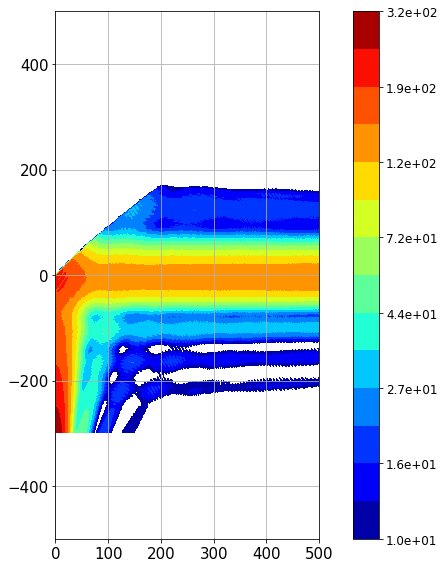

In [22]:
### Create slice data list ###
_slicedata_list = []
_newgrid = ( np.linspace(0, 500, 500+1), np.linspace(-500, 500, 500+1) )
fig, ax, _data_grid = plot2D_key(_raw_data, keys=['z', 'y', 'val0'], logz=True, 
                     levels=np.power(10., np.linspace(10, 25, 15)/10), 
                     newgrid=_newgrid)
_data_grid['val0'] = _data_grid.pop('z') # key name change: z --> val0
_data_grid['val0'][np.isnan(_data_grid['val0'])] = 0.

for _w in _w_list_mm:
    print(f'w = {_w} mm')
    _slicedata_list.append( getSlice(_data_grid, 'x', _w) )
    pass

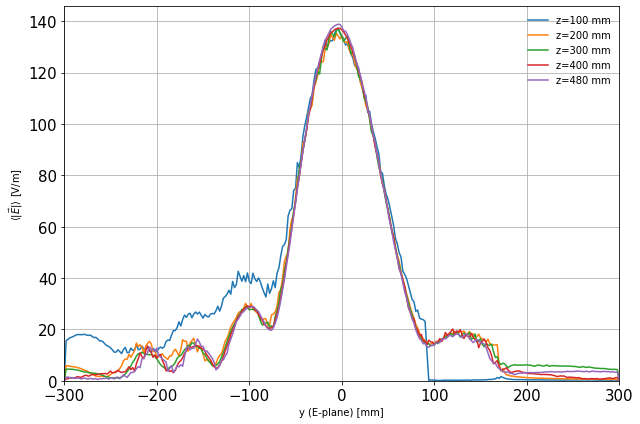

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(9,6))
for _label, _data in zip(_label_list, _slicedata_list):
    ax.plot( _data['y'], _data['val0'], label=_label )
    pass
ax.set_xlim([-300, 300])
ax.set_ylim(bottom=0)
#ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))
ax.legend(frameon=False)
ax.grid(True)
ax.set_xlabel('y (E-plane) [mm]')
ax.set_ylabel(r'$\langle |\vec{E}| \rangle$ [V/m]')
fig.tight_layout()

fwhm 107.10735015634452
x @ y max = -4.0
Beam size @ power = 1/e = 63.74 mm / 64.32 mm
fwhm 102.10961886250486
x @ y max = -6.0
Beam size @ power = 1/e = 60.05 mm / 61.32 mm
fwhm 100.75576482650955
x @ y max = -4.0
Beam size @ power = 1/e = 59.44 mm / 60.51 mm
fwhm 99.64664809640388
x @ y max = -2.0
Beam size @ power = 1/e = 59.26 mm / 59.84 mm
fwhm 98.68028397506285
x @ y max = -4.0
Beam size @ power = 1/e = 58.21 mm / 59.26 mm


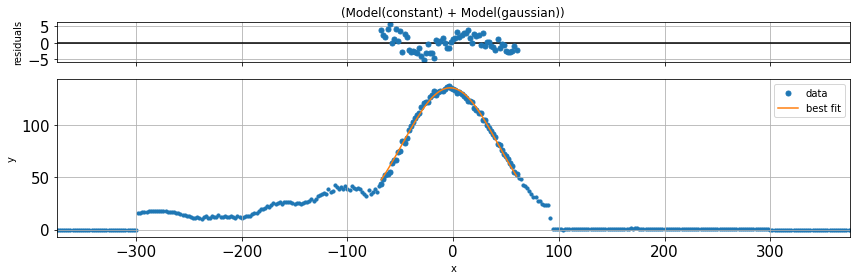

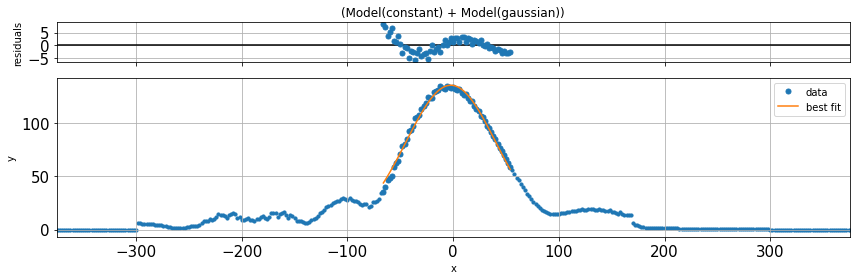

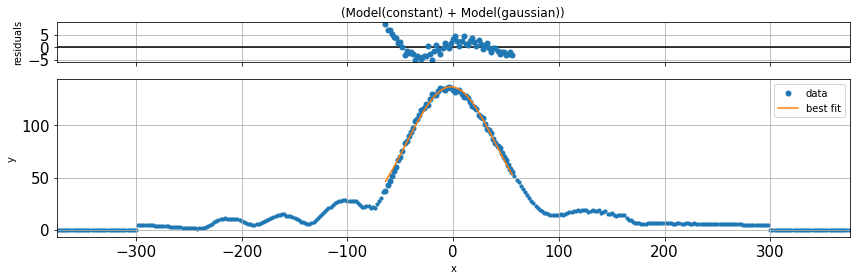

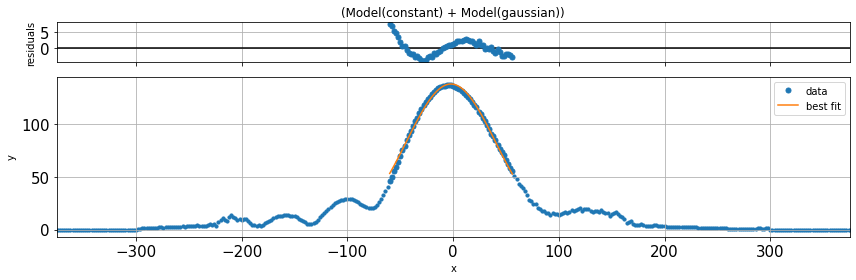

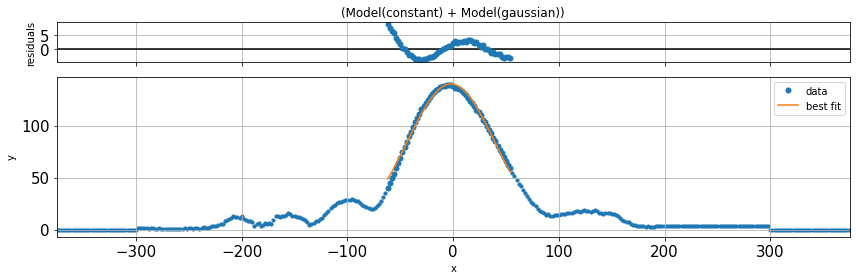

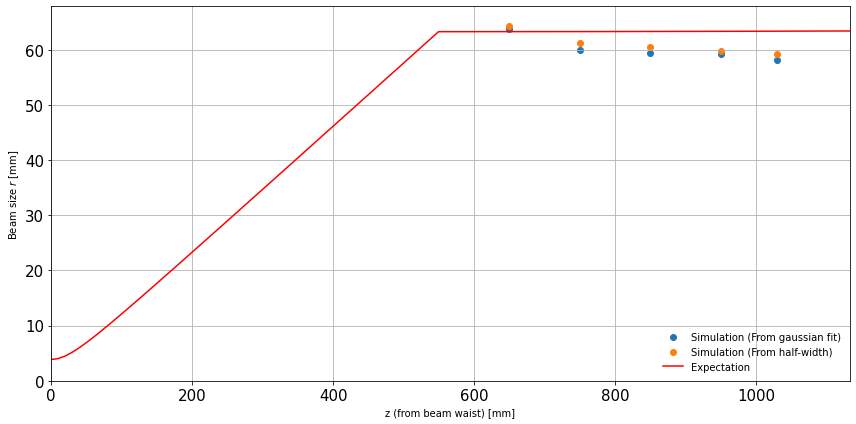

In [24]:
### Calculate beam size ###
_fitresult_list = []
_beamsize_list = []
_beamsize2_list = []
_n_conv = 10
for i, (_label, _data) in enumerate( zip(_label_list, _slicedata_list) ):
    _x = _data['y']
    _y = _data['val0']
    # get running average
    _b = np.ones(_n_conv)/_n_conv 
    _x_ave = np.convolve(_x, _b, mode="same") 
    _y_ave = np.convolve(_y, _b, mode="same") 
    
    # Get hwhm from half value
    _fwhm_from_half = fwhm_to_beamsize( get_fwhm_from_half(_x_ave, _y_ave) )
    _beamsize2_list.append( _fwhm_from_half*mm )
    
    _ymax = np.max(_y)
    _i_ymax = np.where(_y==_ymax)
    _x_ymax = _x[_i_ymax][0]
    print(f'x @ y max = {_x_ymax}')
    _range_scale = 1.0
    #_range_scale = 0.5
    _result = gauss_fit(_x, _y, x_fit_range=[_x_ymax-_fwhm_from_half*_range_scale, _x_ymax+_fwhm_from_half*_range_scale], xlim=[-D_mirror/mm/2, D_mirror/mm/2])
    _fitresult_list.append( _result )
    _beamsize_list.append( sigma2beamsize( _result.result.params['sigma'].value )*mm )
    
    print(f'Beam size @ power = 1/e = {_beamsize_list[-1]/mm:.2f} mm / {_beamsize2_list[-1]/mm:.2f} mm')
    pass

#plt.scatter(_slicedata_list[-1]['y'], _slicedata_list[-1]['val0'])
#plt.xlim(-100, 50)
#plt.ylim(30, 45)

_beamsize_list = np.array(_beamsize_list)
_beamsize2_list = np.array(_beamsize2_list)

### Draw beam size ###

# Temporary Expectation
#_z_tmp_list = z_antenna_list
#_beamsize_tmp_list = calc_beamwaist(z=_z_tmp_list+20*mm, w0=w0*1.0, wavelength=wavelength)
# Simulation
_z_list = _w_list + z_mirror

# Plot Simulation v.s. Expectation
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.scatter(_z_list/mm, _beamsize_list/mm, label='Simulation (From gaussian fit)')
ax.scatter(_z_list/mm, _beamsize2_list/mm, label='Simulation (From half-width)')
ax.plot(z_list/mm, beamsize_list/mm, label='Expectation', c='red')
#ax.plot(_z_tmp_list/mm, _beamsize_tmp_list/mm, label='Expectation (tmp)')
ax.grid(True)
ax.set_xlabel('z (from beam waist) [mm]')
ax.set_ylabel('Beam size $r$ [mm]')
ax.set_xlim(left=0, right=max(_z_list/mm)*1.1)
#ax.set_ylim(bottom=0, top=max(_beamsize_list/mm)*1.1)
ax.set_ylim(bottom=0)
#ax.set_yscale('log')
ax.legend(frameon=False, loc='lower right')
fig.tight_layout()

In [25]:
slicedata_list52 = _slicedata_list
z_list52 = _z_list
w_list52 = _w_list
beamsize_list52 = _beamsize_list
fitresult_list52 = _fitresult_list

## v4-1 Hybrid Solver (for 2D inputs at U=0)
- Solver: transient --> Hybrid Solver (Integral equation, uni-directional) 

In [26]:
_indir = 'input/CST/v4-1HS/E-field_abs_ave/'
_infile = 'w-v.dat'
_w_list_mm = np.array([100, 200, 300, 400, 500])
_w_list= _w_list_mm * mm
_label_list = [ f'z={_w:.0f} mm' for _w in _w_list_mm ]

print(_infile)
_raw_data = read_CST(f'{_indir}/{_infile}', '3D_twovalue', verbose=0)

w-v.dat
input file = input/CST/v4-1HS/E-field_abs_ave//w-v.dat (type=3D_twovalue)


x_list (size=(501,)) = [  0.   1.   2. ... 498. 499. 500.]
y_list (size=(501,)) = [-500. -498. -496. ...  496.  498.  500.]
w = 100 mm
x 100
getSlice min_diff = 0.01
w = 200 mm
x 200
getSlice min_diff = 0.01
w = 300 mm
x 300
getSlice min_diff = 0.01
w = 400 mm
x 400
getSlice min_diff = 0.01
w = 500 mm
x 500
getSlice min_diff = 0.01


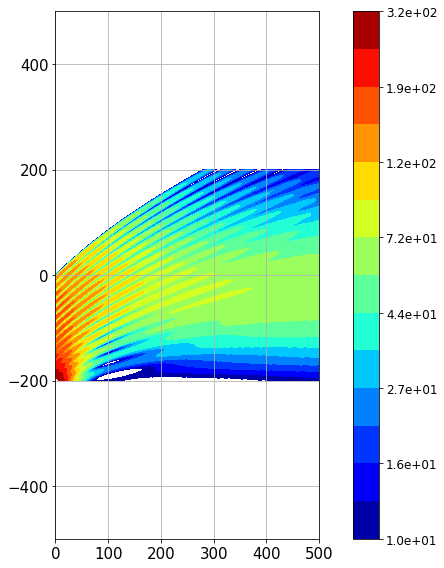

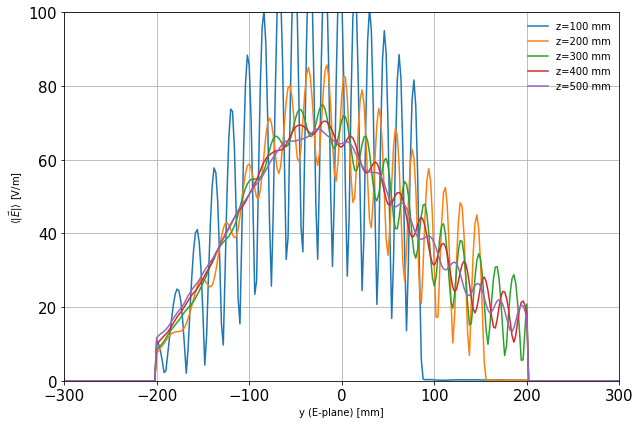

In [27]:
_slicedata_list = []
_newgrid = ( np.linspace(0, 500, 500+1), np.linspace(-500, 500, 500+1) )
fig, ax, _data_grid = plot2D_key(_raw_data, keys=['z', 'y', 'val0'], logz=True, 
                     levels=np.power(10., np.linspace(10, 25, 15)/10), 
                     newgrid=_newgrid)
_data_grid['val0'] = _data_grid.pop('z') # key name change: z --> val0
_data_grid['val0'][np.isnan(_data_grid['val0'])] = 0.

for _w in _w_list_mm:
    print(f'w = {_w} mm')
    _slicedata_list.append( getSlice(_data_grid, 'x', _w) )
    pass

fig, ax = plt.subplots(1, 1, figsize=(9,6))
for _label, _data in zip(_label_list, _slicedata_list):
    ax.plot( _data['y'], _data['val0'], label=_label )
    pass
ax.set_xlim([-300, 300])
ax.set_ylim([0, 100])
ax.legend(frameon=False)
ax.grid(True)
ax.set_xlabel('y (E-plane) [mm]')
ax.set_ylabel(r'$\langle |\vec{E}| \rangle$ [V/m]')
fig.tight_layout()

fwhm 206.821894974693
x @ y max = -34.0
Beam size @ power = 1/e = 110.40 mm / 124.21 mm
fwhm 247.73210925839146
x @ y max = -16.0
Beam size @ power = 1/e = 139.45 mm / 148.78 mm
fwhm 244.47841414068364
x @ y max = -22.0
Beam size @ power = 1/e = 139.62 mm / 146.82 mm
fwhm 246.59276881229457
x @ y max = -18.0
Beam size @ power = 1/e = 140.48 mm / 148.09 mm
fwhm 253.84572335385604
x @ y max = -26.0
Beam size @ power = 1/e = 142.66 mm / 152.45 mm


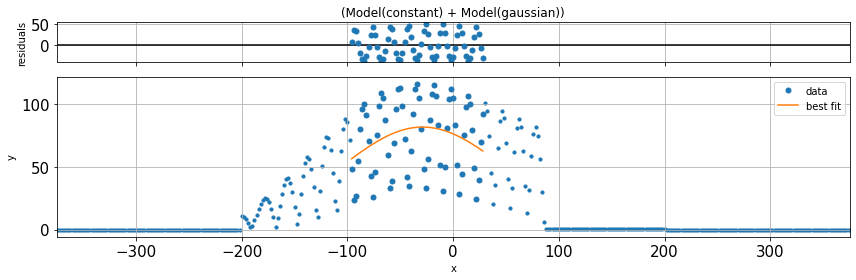

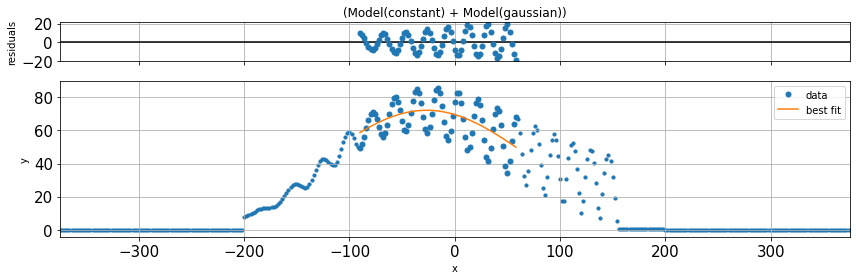

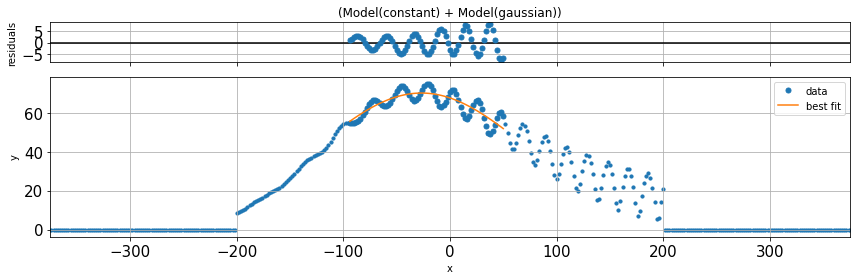

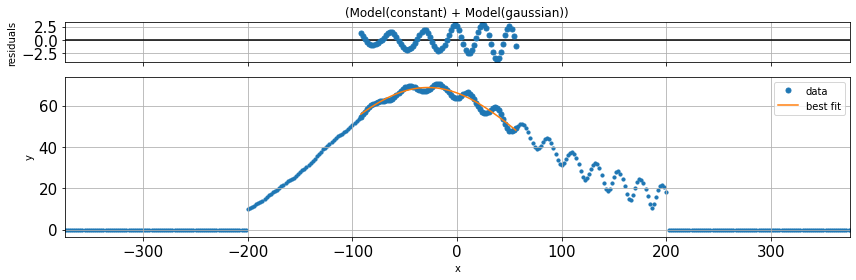

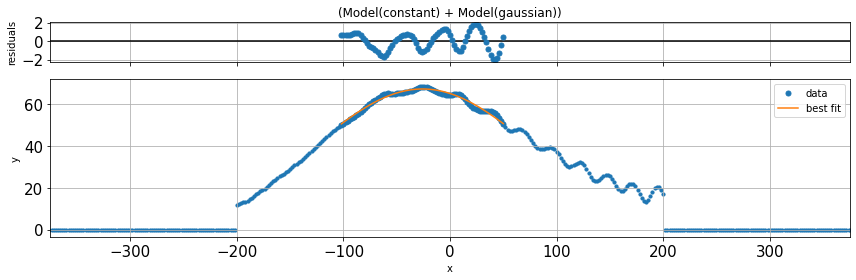

In [28]:
_fitresult_list = []
_beamsize_list = []
_beamsize2_list = []
_n_conv = 40
for i, (_label, _data) in enumerate( zip(_label_list, _slicedata_list) ):
    _x = _data['y']
    _y = _data['val0']
    # get running average
    _b = np.ones(_n_conv)/_n_conv 
    _x_ave = np.convolve(_x, _b, mode="same") 
    _y_ave = np.convolve(_y, _b, mode="same") 
    
    # Get hwhm from half value
    _fwhm_from_half = fwhm_to_beamsize( get_fwhm_from_half(_x_ave, _y_ave) )
    _beamsize2_list.append( _fwhm_from_half*mm )
    
    _ymax = np.max(_y)
    _i_ymax = np.where(_y==_ymax)
    _x_ymax = _x[_i_ymax][0]
    print(f'x @ y max = {_x_ymax}')
    #_range_scale = 1.0
    _range_scale = 0.5
    _result = gauss_fit(_x, _y, x_fit_range=[_x_ymax-_fwhm_from_half*_range_scale, _x_ymax+_fwhm_from_half*_range_scale], xlim=[-D_mirror/mm/2, D_mirror/mm/2])
    _fitresult_list.append( _result )
    _beamsize_list.append( sigma2beamsize( _result.result.params['sigma'].value )*mm )
    
    print(f'Beam size @ power = 1/e = {_beamsize_list[-1]/mm:.2f} mm / {_beamsize2_list[-1]/mm:.2f} mm')
    pass

#plt.scatter(_slicedata_list[-1]['y'], _slicedata_list[-1]['val0'])
#plt.xlim(-100, 50)
#plt.ylim(30, 45)

_beamsize_list = np.array(_beamsize_list)
_beamsize2_list = np.array(_beamsize2_list)

NameError: name 'z_list41' is not defined

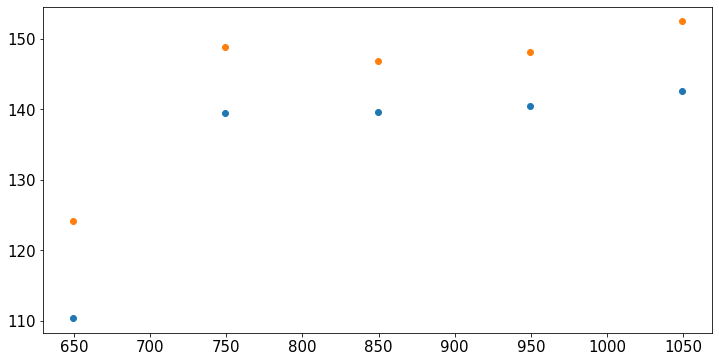

In [29]:
# Temporary Expectation
#_z_tmp_list = z_antenna_list
#_beamsize_tmp_list = calc_beamwaist(z=_z_tmp_list+20*mm, w0=w0*1.0, wavelength=wavelength)
# Simulation
_z_list = _w_list + z_mirror

# Plot Simulation v.s. Expectation
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.scatter(_z_list/mm, _beamsize_list/mm, label='Simulation (From gaussian fit)')
ax.scatter(_z_list/mm, _beamsize2_list/mm, label='Simulation (From half-width)')
ax.scatter(z_list41/mm, beamsize_list41/mm, label='Simulation Full Transient Solver (From gaussian fit)')
ax.plot(z_list/mm, beamsize_list/mm, label='Expectation', c='red')
#ax.plot(_z_tmp_list/mm, _beamsize_tmp_list/mm, label='Expectation (tmp)')
ax.grid(True)
ax.set_xlabel('z (from beam waist) [mm]')
ax.set_ylabel('Beam size $r$ [mm]')
ax.set_xlim(left=0, right=max(_z_list/mm)*1.1)
ax.set_ylim(bottom=0, top=max(_beamsize_list/mm)*1.1)
#ax.set_yscale('log')
ax.legend(frameon=False, loc='lower right')
fig.tight_layout()

slicedata_list41HS = _slicedata_list
z_list41HS = _z_list
w_list41HS = _w_list
beamsize_list41HS = _beamsize_list
fitresult_list41HS = _fitresult_list

### Phase check (E-field u-component)

In [ ]:
#_contourtype = None
#_levels = np.arange(-180, 180, 30)

#_contourtype = 'line'
_contourtype = 'fill-line'
_levels = np.arange(-150, 0, 10)

_indir = 'input/CST/v4-1HS2/'
_infile = 'E-field_u_phase_w200.txt'
_raw_data = read_CST(f'{_indir}/{_infile}', '3D_twovalue', verbose=0)
fig, ax, _data_grid = plot2D_key(_raw_data, keys=['x', 'y', 'val0'], logz=False,
                                 contourtype=_contourtype, levels = _levels, colorbarFormat='%.0f',
                                xlabel='X [mm]', ylabel='Y [mm]', zlabel='Phase [deg]')
ax.set_xlim([-125, 125])
ax.set_ylim([-125, 125])
fig.suptitle('z from mirror = 200 mm')
_infile = 'E-field_u_phase_w500.txt'
_raw_data = read_CST(f'{_indir}/{_infile}', '3D_twovalue', verbose=0)
fig, ax, _data_grid = plot2D_key(_raw_data, keys=['x', 'y', 'val0'], logz=False,
                                 contourtype=_contourtype, levels = _levels, colorbarFormat='%.0f',
                                xlabel='X [mm]', ylabel='Y [mm]', zlabel='Phase [deg]')
ax.set_xlim([-125, 125])
ax.set_ylim([-125, 125])
fig.suptitle('z from mirror = 500 mm')

In [ ]:
_indir = 'input/CST/v4-1HS2/'
_infile = 'E-field_v_phase_w200.txt'
_raw_data = read_CST(f'{_indir}/{_infile}', '3D_twovalue', verbose=0)
fig, ax, _data_grid = plot2D_key(_raw_data, keys=['x', 'y', 'val0'], logz=False,
                                 levels = np.arange(-180, 180, 30), colorbarFormat='%.0f',
                                xlabel='X [mm]', ylabel='Y [mm]', zlabel='Phase [deg]')

### Z/Abs check (E-field $|E_w| / |E|$)

In [ ]:
_levels = np.arange(0, 150, 10)

_indir = 'input/CST/v4-1HS2/'
_infile = 'E-field_w_mag_w500.txt'
_raw_data1 = read_CST(f'{_indir}/{_infile}', '3D_twovalue', verbose=0)
fig, ax, _data_grid = plot2D_key(_raw_data1, keys=['x', 'y', 'val0'], logz=False,
                                 levels = _levels,
                                xlabel='X [mm]', ylabel='Y [mm]', zlabel=r'$|E_z|$ [V/m]')
fig.suptitle(r'z component $|E_z|$')


_indir = 'input/CST/v4-1HS2/'
_infile = 'E-field_abs_mag_w500.txt'
_raw_data2 = read_CST(f'{_indir}/{_infile}', '3D_twovalue', verbose=0)
fig, ax, _data_grid = plot2D_key(_raw_data2, keys=['x', 'y', 'val0'], logz=False,
                                 levels = _levels,
                                xlabel='X [mm]', ylabel='Y [mm]', zlabel=r'$|E|$ [V/m]')
fig.suptitle(r'Absolute component $|E|$')

_data_ratio = _raw_data1
_data_ratio['val0'] = _data_ratio['val0'] / _raw_data2['val0']
fig, ax, _data_grid = plot2D_key(_data_ratio, keys=['x', 'y', 'val0'], logz=False,
                                 levels = np.arange(0, 0.2, 0.01),
                                xlabel='X [mm]', ylabel='Y [mm]', zlabel=r'$|E_z|/|E|$')
fig.suptitle(r'$|E_z| / |E|$')
ax.set_xlim(-125, 125)
ax.set_ylim(-125, 125)

## v4-1 Farfield (Solver Comparison)
- Farfield, Directivity, Phi=90 deg
- v4-1 / v4-1HS / v4-1HS2

In [ ]:
_files = [
    'input/CST/v4-1/farfield_directivity_abs_phi90.txt',
    'input/CST/v4-1HS/farfield_directivity_abs_phi90.txt',
    'input/CST/v4-1HS2/farfield_directivity_abs_phi90.txt',
    'input/CST/v4-2HS3/farfield_directivity_abs_phi90.txt',
]
_labels = [
    'Transient',
    'Hybrid Uni-directional',
    'Hybrid Bi-directional',
    'Hybrid v4-2 Bi-directional d=0.01',
]
_xshifts = [90, 0, 0, 0]

_datalist = []
for _file, _xshift in zip(_files, _xshifts):
    _data = read_CST(_file, datatype='farfield1D', verbose=0)
    _angle = _data['angle']
    _angle = (_angle + _xshift + 180)%360 - 180
    _i_sort = np.argsort(_angle)
    _angle = _angle[_i_sort]
    _val = _data['val'][_i_sort]
    
    _data['angle'] = _angle
    _data['val'] = _val
    
    _datalist.append( _data )
    pass

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
for i, (_data, _label) in enumerate(zip(_datalist, _labels)):
    _x = _data['angle']
    _y = _data['val']
    _x, tmp = func.average_list(_x, 10)
    _y, tmp = func.average_list(_y, 10)
    #sc = ax[0].scatter(_x, _y, label=_label, s=10)
    sc = ax[0].plot(_x, _y, label=_label, lw=2)
    if i == 0:
        _y0 = _y
    else:
        #ax[1].scatter( _x, np.divide(_y, _y0), c=sc.get_ec(), s=10 )
        ax[1].plot( _x, np.divide(_y, _y0), c=sc[0].get_c(), lw=2 )
        pass
    pass
ax[0].legend(frameon=False)
ax[0].grid(True)
ax[1].grid(True)
ax[1].plot([-180,180],[1,1],c='k',lw=1)

ax[0].set_xlim(-90, 90)
ax[1].set_xlim(-90, 90)
fig.tight_layout()

## Circular Antenna v5-1
- 215 GHz
- SP2: Antenna Only < 100 mm
- (U, V, W)
- V: optical axis
- W: E-plane (E direction)

In [30]:
_indir = 'input/CST/v5-1_AntennaOnly/E-field_abs_ave'
_infile = 'w-v.txt'
_w_list_mm = np.array([0, 20, 40, 60, 100])
_w_list= _w_list_mm * mm
_label_list = [ f'z={_w:.0f} mm' for _w in _w_list_mm ]

print(_infile)
_raw_data = read_CST(f'{_indir}/{_infile}', '3D_twovalue', verbose=0)

w-v.txt
input file = input/CST/v5-1_AntennaOnly/E-field_abs_ave/w-v.txt (type=3D_twovalue)


x_list (size=(2001,)) = [0.000e+00 1.000e-01 2.000e-01 ... 1.998e+02 1.999e+02 2.000e+02]
y_list (size=(2001,)) = [-100.   -99.9  -99.8 ...   99.8   99.9  100. ]


/tmp/ipykernel_2029981/3354913882.py:62: UserWarning: Log scale: values of z <= 0 have been masked
  cs = ax.contourf(x_grid, y_grid, z_grid, levels=levels, cmap='jet', locator=locator)


w = 0 mm
x 0
getSlice min_diff = 0.01
w = 20 mm
x 20
getSlice min_diff = 0.01
w = 40 mm
x 40
getSlice min_diff = 0.01
w = 60 mm
x 60
getSlice min_diff = 0.01
w = 100 mm
x 100
getSlice min_diff = 0.01


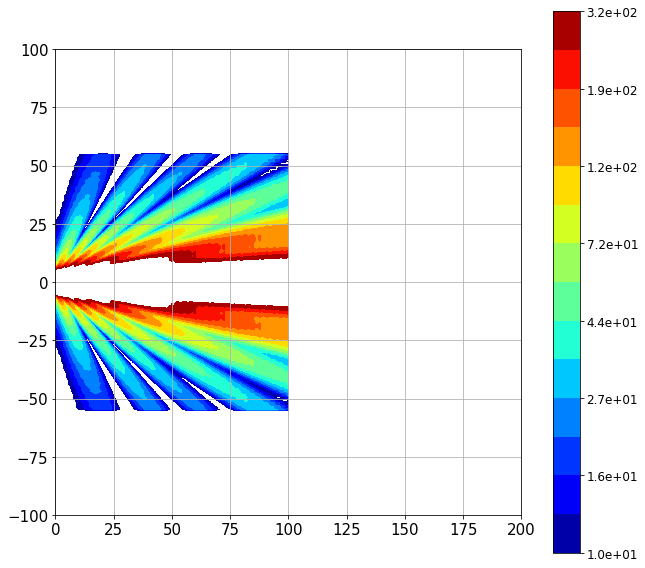

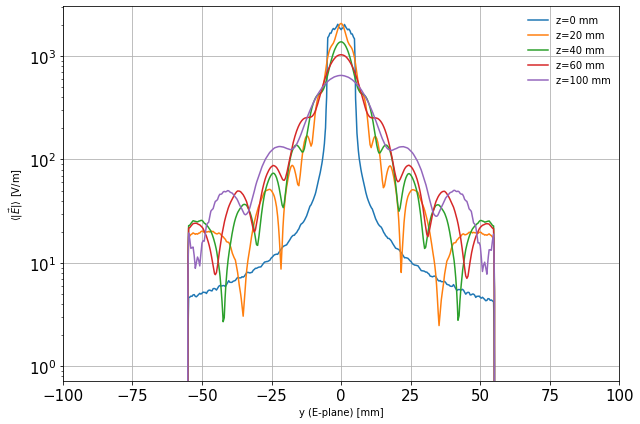

In [39]:
### Create slice data list ###
_slicedata_list = []
_newgrid = ( np.linspace(0, 200, 2000+1), np.linspace(-100, 100, 2000+1) )
fig, ax, _data_grid = plot2D_key(_raw_data, keys=['y', 'z', 'val0'], logz=True, 
                     levels=np.power(10., np.linspace(10, 25, 15)/10), 
                     newgrid=_newgrid)
_data_grid['val0'] = _data_grid.pop('z') # key name change: z --> val0
_data_grid['val0'][np.isnan(_data_grid['val0'])] = 0.

for _w in _w_list_mm:
    print(f'w = {_w} mm')
    _slicedata_list.append( getSlice(_data_grid, 'x', _w) )
    pass

fig, ax = plt.subplots(1, 1, figsize=(9,6))
for _label, _data in zip(_label_list, _slicedata_list):
    ax.plot( _data['y'], _data['val0'], label=_label )
    pass
ax.set_xlim([-100, 100])
#ax.set_ylim(bottom=0)
ax.set_yscale('log')
#ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))
ax.legend(frameon=False)
ax.grid(True)
ax.set_xlabel('y (E-plane) [mm]')
ax.set_ylabel(r'$\langle |\vec{E}| \rangle$ [V/m]')
fig.tight_layout()

fwhm 9.94621256581199
x @ y max = -1.1999999999999886
Beam size @ power = 1/e = 5.96 mm / 5.97 mm
fwhm 9.164609243604161
x @ y max = 0.0
Beam size @ power = 1/e = 5.57 mm / 5.50 mm
fwhm 9.23496736448318
x @ y max = 0.0
Beam size @ power = 1/e = 5.58 mm / 5.55 mm
fwhm 13.089401844742497
x @ y max = 0.0
Beam size @ power = 1/e = 7.87 mm / 7.86 mm
fwhm 21.054644215100492
x @ y max = 0.0
Beam size @ power = 1/e = 12.64 mm / 12.64 mm


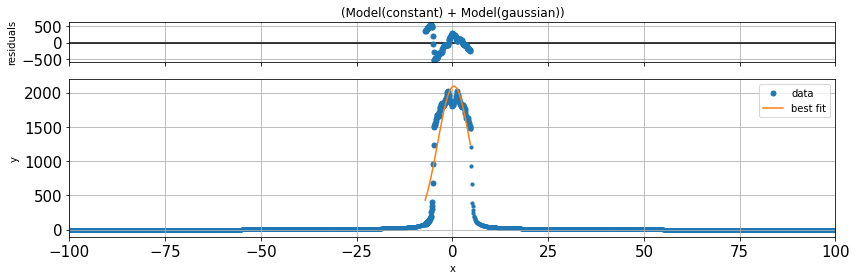

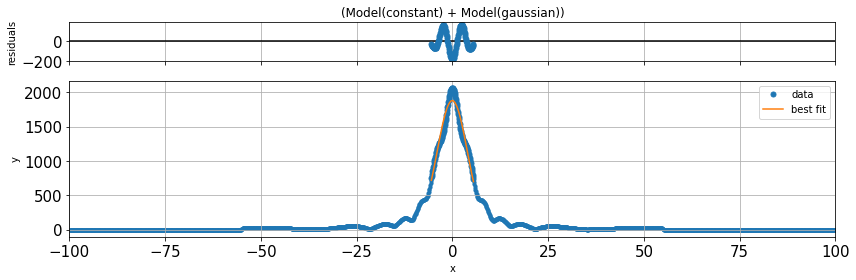

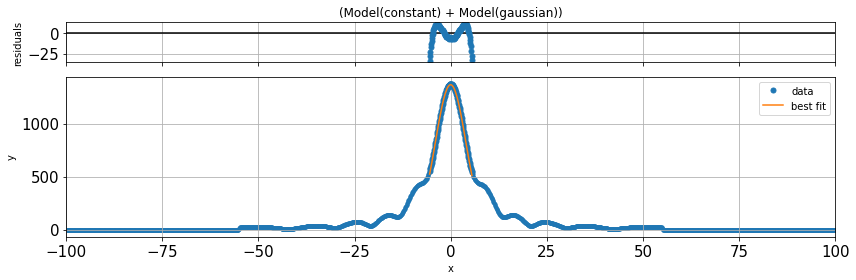

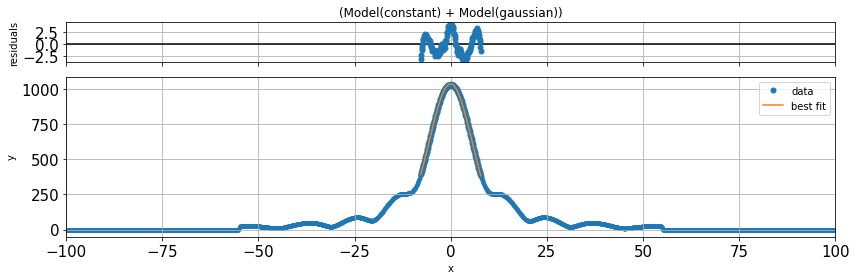

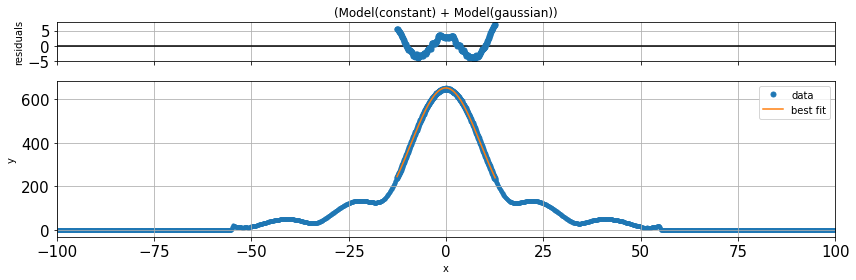

In [40]:
### Calculate beam size ###
_fitresult_list = []
_beamsize_list = []
_beamsize2_list = []
_n_conv = 1
for i, (_label, _data) in enumerate( zip(_label_list, _slicedata_list) ):
    _x = _data['y']
    _y = _data['val0']
    # get running average
    _b = np.ones(_n_conv)/_n_conv 
    _x_ave = np.convolve(_x, _b, mode="same") 
    _y_ave = np.convolve(_y, _b, mode="same") 
    
    # Get hwhm from half value
    _fwhm_from_half = fwhm_to_beamsize( get_fwhm_from_half(_x_ave, _y_ave) )
    _beamsize2_list.append( _fwhm_from_half*mm )
    
    _ymax = np.max(_y)
    _i_ymax = np.where(_y==_ymax)
    _x_ymax = _x[_i_ymax][0]
    print(f'x @ y max = {_x_ymax}')
    _range_scale = 1.0
    #_range_scale = 0.5
    _result = gauss_fit(_x, _y, x_fit_range=[_x_ymax-_fwhm_from_half*_range_scale, _x_ymax+_fwhm_from_half*_range_scale], 
                        xlim=[-100, 100])
    _fitresult_list.append( _result )
    _beamsize_list.append( sigma2beamsize( _result.result.params['sigma'].value )*mm )
    
    print(f'Beam size @ power = 1/e = {_beamsize_list[-1]/mm:.2f} mm / {_beamsize2_list[-1]/mm:.2f} mm')
    pass

#plt.scatter(_slicedata_list[-1]['y'], _slicedata_list[-1]['val0'])
#plt.xlim(-100, 50)
#plt.ylim(30, 45)

_beamsize_list = np.array(_beamsize_list)
_beamsize2_list = np.array(_beamsize2_list)

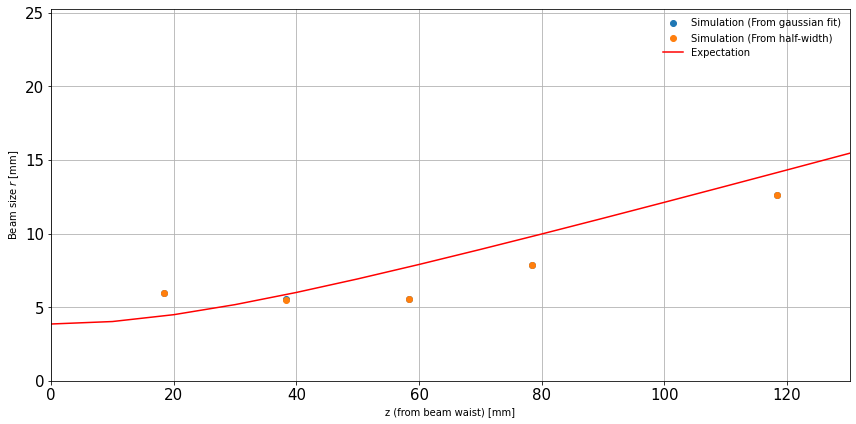

In [41]:
# Simulation
_z_list = _w_list + d_waist

# Plot Simulation v.s. Expectation
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.scatter(_z_list/mm, _beamsize_list/mm, label='Simulation (From gaussian fit)')
ax.scatter(_z_list/mm, _beamsize2_list/mm, label='Simulation (From half-width)')
ax.plot(z_antenna_list/mm, beamsize_antenna_list/mm, label='Expectation', c='red')
ax.grid(True)
ax.set_xlabel('z (from beam waist) [mm]')
ax.set_ylabel('Beam size $r$ [mm]')
ax.set_xlim(left=0, right=max(_z_list/mm)*1.1)
ax.set_ylim(bottom=0, top=max(_beamsize_list/mm)*2)
#ax.set_yscale('log')
ax.legend(frameon=False)
fig.tight_layout()

slicedata_list51Antenna = _slicedata_list
z_list51Antenna = _z_list
w_list51Antenna = _w_list
beamsize_list51Antenna = _beamsize_list
fitresult_list51Antenna = _fitresult_list

w0 = 4.258960036086434 +- 0.451225645973872 mm
z0 = -11.385613288792367 +- 6.878226338762574 mm
redchi = 8.016660950693337e-07
success = True
w0 = 4.51832273314709 +- 0.5938757165460938 mm
z0 = -7.4740217519936865 +- 8.628444569282152 mm
redchi = 1.2176388985191597e-06
success = True


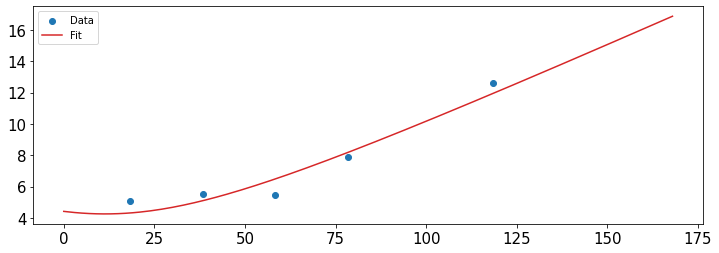

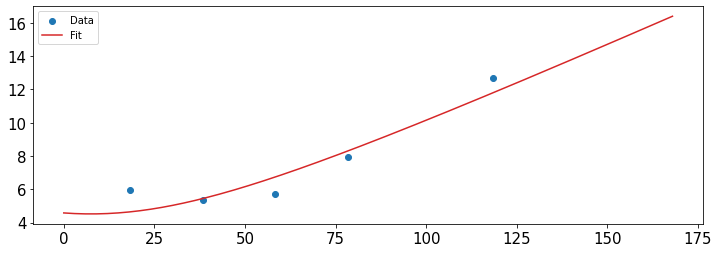

In [34]:
fit_beamsize(_z_list, _beamsize_list, w0)
fit_beamsize(_z_list, _beamsize2_list, w0)

# The End